## This notebook aims to analyse the shortcomings of the heuristic function to determine the eviction of assets


In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [7]:
basis = pd.read_csv('data/basis_df_clean_cols.csv')
funding_rates = pd.read_csv('data/eight_hour_funding_clean_cols.csv')
basis.set_index('time', inplace=True)
funding_rates.set_index('time', inplace=True)

In [8]:
basis

,APTUSDT,AGLDUSDT,BNTUSDT,KEYUSDT,BLURUSDT,CFXUSDT,SSVUSDT,ADAUSDT,GMTUSDT,APEUSDT,...,MASKUSDT,MAVUSDT,ZENUSDT,ICPUSDT,MAGICUSDT,ACHUSDT,CRVUSDT,SPELLUSDT,ZILUSDT,ETHUSDT
time,,,,,,,,,,,,,,,,,,,,,
2021-02-13 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00197,NaN,NaN,...,NaN,NaN,0.465,NaN,NaN,NaN,0.0040,NaN,0.00077,3.06
2021-02-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00316,NaN,NaN,...,NaN,NaN,0.317,NaN,NaN,NaN,0.0070,NaN,0.00090,3.38
2021-02-14 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00053,NaN,NaN,...,NaN,NaN,0.139,NaN,NaN,NaN,0.0060,NaN,0.00042,3.79
2021-02-14 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00144,NaN,NaN,...,NaN,NaN,0.221,NaN,NaN,NaN,0.0020,NaN,0.00043,3.17
2021-02-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00013,NaN,NaN,...,NaN,NaN,0.229,NaN,NaN,NaN,0.0030,NaN,0.00002,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,-0.0080,-0.0033,-0.00049,NaN,-0.00018,-0.00006,-0.008,-0.00050,-0.00009,-0.0006,...,-0.0024,-0.00021,-0.004,-0.005,-0.0001,-0.000025,0.0003,-2.400000e-06,-0.00001,-1.28
2025-02-08 08:00:00+00:00,0.0005,0.0003,0.00017,NaN,0.00000,-0.00011,-0.002,-0.00050,0.00000,-0.0012,...,-0.0018,-0.00001,0.000,-0.006,-0.0003,-0.000007,0.0003,-1.500000e-06,-0.00001,-1.18
2025-02-08 16:00:00+00:00,0.0011,-0.0068,-0.00028,NaN,-0.00012,-0.00006,-0.013,-0.00040,-0.00004,0.0001,...,-0.0018,-0.00008,-0.015,-0.005,-0.0003,-0.000014,-0.0007,-9.000000e-07,-0.00002,-1.47


In [9]:
funding_rates

,APTUSDT,AGLDUSDT,BNTUSDT,KEYUSDT,BLURUSDT,CFXUSDT,SSVUSDT,ADAUSDT,GMTUSDT,APEUSDT,...,MASKUSDT,MAVUSDT,ZENUSDT,ICPUSDT,MAGICUSDT,ACHUSDT,CRVUSDT,SPELLUSDT,ZILUSDT,ETHUSDT
time,,,,,,,,,,,,,,,,,,,,,
2021-02-13 16:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,NaN,0.000100,NaN,NaN,...,NaN,NaN,0.002672,NaN,NaN,NaN,0.001913,NaN,0.000811,0.000947
2021-02-14 00:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,NaN,0.000674,NaN,NaN,...,NaN,NaN,0.002810,NaN,NaN,NaN,0.002581,NaN,0.003204,0.001108
2021-02-14 08:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,NaN,0.001900,NaN,NaN,...,NaN,NaN,0.002028,NaN,NaN,NaN,0.001649,NaN,0.001057,0.001768
2021-02-14 16:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,NaN,0.002005,NaN,NaN,...,NaN,NaN,0.002835,NaN,NaN,NaN,0.001332,NaN,0.001484,0.001243
2021-02-15 00:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,NaN,0.000877,NaN,NaN,...,NaN,NaN,0.001694,NaN,NaN,NaN,0.001583,NaN,0.000812,0.000795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,-0.000367,-0.000097,-0.000042,0.0001,-0.000087,0.000100,0.000094,-0.000099,0.000100,-0.000120,...,0.000100,-0.000021,0.000073,0.000041,0.000089,-0.000235,0.000100,-0.000482,-0.000182,-0.000019
2025-02-08 08:00:00+00:00,-0.000323,-0.005060,0.000100,0.0001,0.000009,0.000100,-0.000063,0.000018,-0.000015,-0.000101,...,-0.000045,0.000100,0.000100,0.000008,0.000002,-0.000013,0.000100,-0.001212,0.000100,0.000095
2025-02-08 16:00:00+00:00,-0.000353,-0.002566,0.000098,0.0001,-0.000047,0.000100,0.000100,-0.000044,0.000100,-0.000071,...,0.000039,0.000100,0.000074,0.000100,0.000061,0.000053,0.000100,-0.000736,0.000100,0.000069


#### Just cleaning the data here...

In [10]:
# we need to remove the funding rates and basis that are NaN
# this can happen because some assets are not traded on both SPOT and futures on binance

# can be achieved by looking the last row of basis and seeing if it is NaN

print(f"there were {len(basis.columns)} cols")  

for i in basis.columns:
    if pd.isna(basis[i].iloc[-1]):  # Correct NaN check
        print("dropping " + i)
        basis = basis.drop(i, axis=1)  # Correct axis for dropping a column

print(f"there are {len(basis.columns)} cols")


print(f"there are {len(basis.columns)} cols")

there were 188 cols
dropping KEYUSDT
dropping KLAYUSDT
dropping AGIXUSDT
dropping DARUSDT
dropping WAVESUSDT
dropping FTMUSDT
dropping OCEANUSDT
dropping XMRUSDT
dropping RENUSDT
dropping OMGUSDT
dropping XEMUSDT
there are 177 cols
there are 177 cols


In [11]:
# now we need to remove the rows not basis from funding rate df
for i in funding_rates.columns:
    if i not in basis.columns:
        funding_rates.drop(i, axis=1, inplace=True)

In [12]:
funding_rates

,APTUSDT,AGLDUSDT,BNTUSDT,BLURUSDT,CFXUSDT,SSVUSDT,ADAUSDT,GMTUSDT,APEUSDT,INJUSDT,...,MASKUSDT,MAVUSDT,ZENUSDT,ICPUSDT,MAGICUSDT,ACHUSDT,CRVUSDT,SPELLUSDT,ZILUSDT,ETHUSDT
time,,,,,,,,,,,,,,,,,,,,,
2021-02-13 16:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,0.000100,NaN,NaN,NaN,...,NaN,NaN,0.002672,NaN,NaN,NaN,0.001913,NaN,0.000811,0.000947
2021-02-14 00:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,0.000674,NaN,NaN,NaN,...,NaN,NaN,0.002810,NaN,NaN,NaN,0.002581,NaN,0.003204,0.001108
2021-02-14 08:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,0.001900,NaN,NaN,NaN,...,NaN,NaN,0.002028,NaN,NaN,NaN,0.001649,NaN,0.001057,0.001768
2021-02-14 16:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,0.002005,NaN,NaN,NaN,...,NaN,NaN,0.002835,NaN,NaN,NaN,0.001332,NaN,0.001484,0.001243
2021-02-15 00:00:00+00:00,NaN,NaN,0.000100,NaN,NaN,NaN,0.000877,NaN,NaN,NaN,...,NaN,NaN,0.001694,NaN,NaN,NaN,0.001583,NaN,0.000812,0.000795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,-0.000367,-0.000097,-0.000042,-0.000087,0.000100,0.000094,-0.000099,0.000100,-0.000120,0.000077,...,0.000100,-0.000021,0.000073,0.000041,0.000089,-0.000235,0.000100,-0.000482,-0.000182,-0.000019
2025-02-08 08:00:00+00:00,-0.000323,-0.005060,0.000100,0.000009,0.000100,-0.000063,0.000018,-0.000015,-0.000101,-0.000063,...,-0.000045,0.000100,0.000100,0.000008,0.000002,-0.000013,0.000100,-0.001212,0.000100,0.000095
2025-02-08 16:00:00+00:00,-0.000353,-0.002566,0.000098,-0.000047,0.000100,0.000100,-0.000044,0.000100,-0.000071,-0.000130,...,0.000039,0.000100,0.000074,0.000100,0.000061,0.000053,0.000100,-0.000736,0.000100,0.000069


In [13]:
# import the spot market data
spot = pd.read_csv('data/spot_price_clean.csv')
spot = spot.set_index('time')
# remove tickers that are not in funding rates
spot_valid = spot[list(set(funding_rates.columns)&set(spot.columns))]
basis_valid = basis[list(set(funding_rates.columns)&set(spot.columns))] 
funding_rates_valid = funding_rates[list(set(funding_rates.columns)&set(spot.columns))]

# recover futures price
futures_valid = spot_valid + basis_valid

futures_valid

,IDUSDT,ONEUSDT,ARKMUSDT,CRVUSDT,VETUSDT,XRPUSDC,RVNUSDT,WLDUSDC,ATOMUSDT,ENSUSDT,...,XRPUSDT,FLOWUSDT,SANDUSDT,WOOUSDT,BALUSDT,ANKRUSDT,DOGEUSDC,SOLUSDT,FILUSDT,SXPUSDT
time,,,,,,,,,,,,,,,,,,,,,
2021-02-13 16:00:00+00:00,NaN,NaN,NaN,3.293,0.054911,NaN,NaN,NaN,20.303,NaN,...,0.6348,NaN,0.20749,NaN,48.743,0.024758,NaN,8.7627,41.702,2.7154
2021-02-14 00:00:00+00:00,NaN,NaN,NaN,3.281,0.053135,NaN,NaN,NaN,20.149,NaN,...,0.6201,NaN,0.28118,NaN,46.962,0.024447,NaN,8.7215,41.643,2.5859
2021-02-14 08:00:00+00:00,NaN,NaN,NaN,3.006,0.050830,NaN,NaN,NaN,18.821,NaN,...,0.5898,NaN,0.24890,NaN,44.426,0.022716,NaN,8.6976,47.042,2.2331
2021-02-14 16:00:00+00:00,NaN,NaN,NaN,2.957,0.052313,NaN,NaN,NaN,19.133,NaN,...,0.5935,NaN,0.26700,NaN,44.394,0.027050,NaN,8.7306,47.202,2.3157
2021-02-15 00:00:00+00:00,NaN,NaN,NaN,2.788,0.050704,NaN,NaN,NaN,20.190,NaN,...,0.5626,NaN,0.25252,NaN,42.941,0.028870,NaN,8.2797,43.980,2.1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,0.24611,0.01379,0.7230,0.482,0.032521,2.3934,0.01368,1.22626,4.375,24.857,...,2.3929,0.481,0.37193,0.11053,1.860,0.021620,0.24804,192.6900,3.197,0.2130
2025-02-08 08:00:00+00:00,0.24632,0.01390,0.7237,0.484,0.032404,2.3897,0.01391,1.23732,4.438,24.807,...,2.3900,0.487,0.37486,0.11089,1.831,0.021840,0.24854,193.3200,3.211,0.2158
2025-02-08 16:00:00+00:00,0.25935,0.01448,0.6953,0.510,0.032953,2.4178,0.01434,1.24681,4.564,25.102,...,2.4179,0.500,0.38772,0.11600,1.862,0.022720,0.25279,199.2100,3.302,0.2222


### We will test the Heuristic function here
- The main idea is to use the heuristic function to determine the positions to take
- The heuristic is designed to reward high returns and penalize high volatility

$$
\textbf{Heuristic Function:}
$$

$$
\text{heuristic}(\text{column}, \text{window} = 5, \text{penalty} = 0.4)
$$

$$
\text{heu} = \frac{|\mathbb{E}_w[\text{column}]|}{\sigma_w(\text{column})}
$$

**where:**

$$
\mathbb{E}_w[\text{column}] = \text{column.rolling(window).mean()}
$$

is the **moving average** (expected return).

$$
\sigma_w(\text{column}) = \text{column.rolling(window).std()}
$$

is the **rolling standard deviation** (volatility).

$$
\text{heu}
$$

is the computed heuristic value.

---

To **apply a penalty for sign changes**, we define:

$$
\text{sign\_change} = (\text{sign}(\text{column}) \neq \text{sign}(\text{column}.shift(1)))
$$

$$
\text{heu}[\text{sign\_change}] *= \text{penalty}
$$


In [14]:
def heuristc(column: pd.Series, window: int = 5, penalty: float = 0.4):
    heu = abs(column.rolling(window).mean())/(column.rolling(window).std())
    sign_change = np.sign(column) != np.sign(column.shift(1))
    heu[sign_change] *= penalty
    return heu

# apply the heuristic
funding_rate_heuristic = heuristc(funding_rates_valid, window=10, penalty=0.6)

In [15]:
funding_rate_heuristic

,IDUSDT,ONEUSDT,ARKMUSDT,CRVUSDT,VETUSDT,XRPUSDC,RVNUSDT,WLDUSDC,ATOMUSDT,ENSUSDT,...,XRPUSDT,FLOWUSDT,SANDUSDT,WOOUSDT,BALUSDT,ANKRUSDT,DOGEUSDC,SOLUSDT,FILUSDT,SXPUSDT
time,,,,,,,,,,,,,,,,,,,,,
2021-02-13 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-14 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-14 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-15 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,1.497400,0.483184,0.005995,0.466556,0.611589,0.344629,0.175893,1.083842,1.589647,0.471504,...,0.059856,1.405373,0.635706,0.415991,0.220968,0.132106,0.174501,0.210751,0.333375,0.003077
2025-02-08 08:00:00+00:00,1.649785,0.497136,0.176063,0.501929,1.019316,0.873590,0.197498,1.026338,1.461996,0.512624,...,0.072527,1.604332,0.524677,0.806826,0.220968,0.092267,0.041926,0.137732,0.352227,0.207987
2025-02-08 16:00:00+00:00,1.700898,0.497136,0.078513,0.653702,1.019316,0.861681,0.138617,1.450085,1.478763,0.478035,...,0.120705,0.547733,0.645029,0.821596,0.368280,0.153778,0.232432,0.014262,0.234862,0.258185


In [ ]:
# testing getting the top k candidates per row, k=10

for i, row in funding_rate_heuristic[10:].iterrows():
    # print(row.sort_values(ascending=False).head(10))
    # getting the tickers
    print(row.sort_values(ascending=False).head(30).index.tolist())  


['BNTUSDT', 'BTCUSDT', 'ETHUSDT', 'YFIUSDT', 'LTCUSDT', 'ZECUSDT', 'MKRUSDT', 'IOTAUSDT', 'LINKUSDT', 'XTZUSDT', 'THETAUSDT', 'DASHUSDT', 'ALGOUSDT', 'FILUSDT', 'ATOMUSDT', 'BCHUSDT', 'ETCUSDT', 'DOGEUSDT', 'AAVEUSDT', 'EOSUSDT', 'DOTUSDT', 'ANKRUSDT', 'ZENUSDT', 'RLCUSDT', 'ALPHAUSDT', 'NEOUSDT', 'XRPUSDT', 'BATUSDT', 'XLMUSDT', 'ONTUSDT']
['BNTUSDT', 'BTCUSDT', 'YFIUSDT', 'ETHUSDT', 'THETAUSDT', 'ZECUSDT', 'LTCUSDT', 'LINKUSDT', 'MKRUSDT', 'RLCUSDT', 'ALGOUSDT', 'FILUSDT', 'ETCUSDT', 'IOTAUSDT', 'ANKRUSDT', 'DASHUSDT', 'XTZUSDT', 'BCHUSDT', 'AAVEUSDT', 'EOSUSDT', 'ALPHAUSDT', 'ATOMUSDT', 'DOGEUSDT', 'BATUSDT', '1INCHUSDT', 'ONTUSDT', 'DOTUSDT', 'ZENUSDT', 'EGLDUSDT', 'NEOUSDT']
['BNTUSDT', 'BTCUSDT', 'YFIUSDT', 'ETHUSDT', 'ETCUSDT', 'ZECUSDT', 'LTCUSDT', 'LINKUSDT', 'THETAUSDT', 'ALGOUSDT', 'IOTAUSDT', 'FILUSDT', 'ALPHAUSDT', 'AAVEUSDT', 'RLCUSDT', 'DASHUSDT', 'XTZUSDT', 'ANKRUSDT', 'MKRUSDT', 'ONTUSDT', 'EOSUSDT', '1INCHUSDT', 'DOTUSDT', 'DOGEUSDT', 'BCHUSDT', 'EGLDUSDT', 'BATUSDT',

### Now, we look at the find the probability of the top 10 being in the next top 20

In [93]:
# find the probability of the top 10 being in the next top 20

# get the top 10 tickers from the 10th row
curr_top_10 = set(funding_rate_heuristic.iloc[10].sort_values(ascending=False).head(10).index)
p = []

for i, row in funding_rate_heuristic.iloc[11:].iterrows():  # Start from row 11
    # get the top 20 tickers
    top_20 = set(row.sort_values(ascending=False).head(20).index)
    
    # find the intersection
    intersection = curr_top_10.intersection(top_20)
    
    if intersection:  
        prob = len(intersection) / len(curr_top_10)  # proportion of top 10 in top 30
        p.append(prob)
    curr_top_10 = set(row.sort_values(ascending=False).head(10).index)

In [98]:
# probability of the top 10 being in the next top 20
np.mean(p), np.std(p), np.median(p)

(np.float64(0.9142431192660552),
 np.float64(0.11772450959370151),
 np.float64(0.9))

(array([   4.,    6.,    5.,   17.,   44.,   87.,  199.,  524., 1305.,
        2169.]),
 array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 <BarContainer object of 10 artists>)

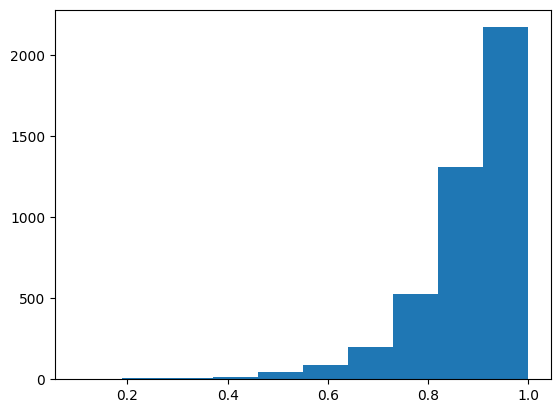

In [104]:
import matplotlib.pyplot as plt

plt.hist(p)

### this means that on average, we need to realloate 1 asset every cycle using the heuristic
#### we can see that there are some cases where we need to rebalance more than 1 asset
#### solution might be to rebalance the bottom 3 rated assets 
#### (or rather, only allow rebalancing of 30% of portfolio)

### End of notebook, run BacktestEngine.py to run the backtest
### Or if you do not want to run the backtest, you can just open the output.html file to view the results